<a href="https://colab.research.google.com/github/popkdodge/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



### 1) Write a function 


In [0]:
# Write a function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  '''# Prior Probability
  p_infected = .005
  # True Positive Rate 
  p_pos_infected = 1
  # False Positive Rate
  p_pos_not_infected = .01 '''
  # Complement Prior
  comp_p = 1 - prob_drunk_prior

  numerator = true_positive_rate*prob_drunk_prior

  denominator = true_positive_rate*prob_drunk_prior + false_positive_rate*comp_p

  posterior_probability = numerator / denominator

  return posterior_probability

In [0]:
one_test = prob_drunk_given_positive(0.001, 0.08, 1)
one_test

0.012357884330202669

In [0]:
print("After one test the probability that a person is drunk is : ", prob_drunk_given_positive(0.001, 0.08, 1)*100, '%')

After one test the probability that a person is drunk is :  1.2357884330202669 %


In [0]:
print("After two test the probability that a person is drunk is : ", prob_drunk_given_positive(one_test, 0.08, 1)*100, '%')

After two test the probability that a person is drunk is :  13.525210993291495 %


In [0]:
two_test = prob_drunk_given_positive(one_test, 0.08, 1)
print(two_test)
three_test = prob_drunk_given_positive(two_test, 0.08, 1)
print(three_test)
four_test = prob_drunk_given_positive(three_test, 0.08, 1)
print(four_test)

0.13525210993291495
0.6615996951348605
0.9606895076105054


In [0]:
#After four breathalizer the probability that a person is drunk is over 95%.


In [0]:
# Write a function revamp
def prob_drunk_given_positive_repeat(prob_drunk_prior, false_positive_rate, true_positive_rate, num_test):
  probabilities = []
  prior = prob_drunk_prior
  for test in range(1,(num_test+1)):
    prior = prob_drunk_given_positive(prior, false_positive_rate, true_positive_rate)
    probabilities.append(prior) 

  return probabilities

In [0]:
twenty_test_graph = prob_drunk_given_positive_repeat(0.001, 0.08, 1, 20)

In [0]:
twenty_test_graph

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192,
 0.9999999991418655,
 0.9999999999313492,
 0.999999999994508,
 0.9999999999995607,
 0.9999999999999648,
 0.9999999999999972,
 0.9999999999999998,
 1.0,
 1.0,
 1.0]

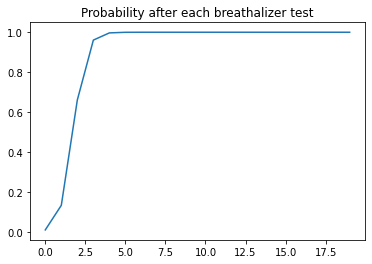

In [0]:
import matplotlib.pyplot as plt

plt.plot(twenty_test_graph)
plt.title("Probability after each breathalizer test")
plt.show()

In [0]:
prob_drunk_given_positive(0.001, 0.08, 1)

0.012357884330202669

### 2) Explore `scipy.stats.bayes_mvs`  

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

--2020-05-14 04:22:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-05-14 04:22:48 (131 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)
df = df.replace({"y": 1, "n": 0, "?": np.NaN})

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
sample = df.sample(50)

In [0]:
sample['water-project'].dropna()

323    1.0
400    1.0
241    0.0
227    0.0
176    0.0
153    0.0
95     0.0
321    1.0
315    1.0
310    0.0
430    0.0
155    1.0
194    0.0
326    1.0
403    1.0
161    0.0
148    1.0
7      1.0
133    0.0
352    1.0
118    1.0
29     1.0
317    0.0
10     1.0
157    1.0
143    1.0
142    0.0
169    0.0
333    0.0
177    0.0
309    0.0
64     1.0
417    1.0
67     1.0
61     1.0
247    1.0
336    0.0
163    1.0
293    1.0
313    1.0
110    0.0
419    1.0
39     0.0
97     0.0
145    0.0
Name: water-project, dtype: float64

In [0]:
def under_confient_interval (sample, confidence=0.95):
  #drop NaN values
  no_nan = sample.dropna()
  #finding samplie x_bar values
  x_bar = np.mean(no_nan)
  #finding std of sample
  std = np.std(no_nan, ddof=1)
  #finding the sample amounts
  sample_ammount = len(no_nan)
  #calculate t
  t_score = stats.t.ppf((1 + confidence) / 2.0, sample_ammount - 1)
  #finding std error
  std_err = std / np.sqrt(sample_ammount)
  #finding margin of error
  margin_of_error = t_score*std_err
  #Identifying upper and lower bound
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error

  return (lower_bound, x_bar, upper_bound)


0.15157608375353493


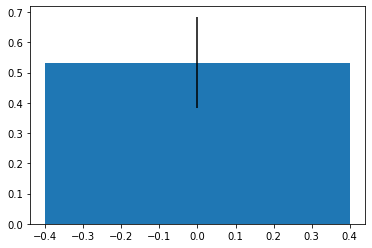

In [0]:
test_data_conf_int = under_confient_interval(sample['water-project'])
test_data_conf_int
lower, mean, upper = test_data_conf_int
moe = upper - mean
print(moe)
plt.bar(0, mean, yerr=moe)
plt.show()

In [0]:
stats.bayes_mvs(sample['water-project'].dropna())

(Mean(statistic=0.5333333333333333, minmax=(0.40696299609397557, 0.6597036705726911)),
 Variance(statistic=0.26666666666666666, minmax=(0.18518247057692744, 0.37599693218717906)),
 Std_dev(statistic=0.5133334017665105, minmax=(0.43032832881060407, 0.6131858871396005)))

In [0]:
mean_ci, _, _ = stats.bayes_mvs(sample['water-project'].dropna())
print(mean_ci)
mean1, minmax = mean_ci

Mean(statistic=0.5333333333333333, minmax=(0.40696299609397557, 0.6597036705726911))


In [0]:
mean1

0.5333333333333333

In [0]:
min1, max1 = minmax

In [0]:
moe1 = max1 - mean1

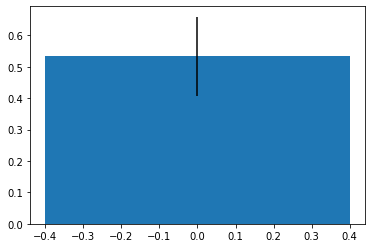

In [0]:
plt.bar(0, mean1, yerr=moe1)
plt.show()

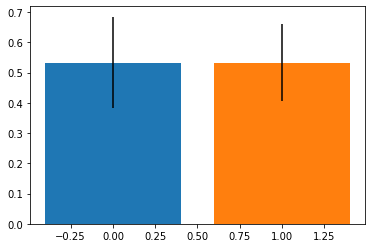

In [0]:
plt.bar(0, mean, yerr=moe)
plt.bar(1, mean1, yerr=moe1)
plt.show()

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist relais on gathering informations and drawing conclusion from gathered samples.  Frequentist statistic given all the information are able to draws the answer to everything. Baysians relais on using a preconcived probability base on previous believed notions and probability and draw conclution that way. Baysian tends to be more efficient and more flexible because Baysian is able to update its preconcived probability and not as confined by sample sets.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,1,female,39.0,1,1,83.1583,C,First,woman,False,E,Cherbourg,False
192,1,3,female,19.0,1,0,7.8542,S,Third,woman,False,NaN,Southampton,False
629,0,3,male,NaN,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,True
559,1,3,female,36.0,1,0,17.4000,S,Third,woman,False,NaN,Southampton,False


In [0]:
train['survived']

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 668, dtype: int64

In [0]:
mean_ci, _, _ = stats.bayes_mvs(train['survived'].dropna())
print(mean_ci)
mean1, minmax = mean_ci

Mean(statistic=0.38622754491017963, minmax=(0.3551752810677088, 0.4172798087526504))


In [0]:
stats.ttest_1samp(train['survived'], 0.4, nan_policy='omit')

Ttest_1sampResult(statistic=-0.7305483479118925, pvalue=0.46531159338683736)

In [0]:
sorted_train = train.sort_values('survived',ascending=True)
sorted_train = sorted_train.replace({'male':0, 'female':1, True:1, False:0})
sorted_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
105,0,3,0,28.0,0,0,7.8958,S,Third,man,1,NaN,Southampton,1
824,0,3,0,2.0,4,1,39.6875,S,Third,child,0,NaN,Southampton,0
221,0,2,0,27.0,0,0,13.0000,S,Second,man,1,NaN,Southampton,1
514,0,3,0,24.0,0,0,7.4958,S,Third,man,1,NaN,Southampton,1
69,0,3,0,26.0,2,0,8.6625,S,Third,man,1,NaN,Southampton,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,3,0,9.0,0,2,20.5250,S,Third,child,0,NaN,Southampton,0
591,1,1,1,52.0,1,0,78.2667,C,First,woman,0,D,Cherbourg,0
879,1,1,1,56.0,0,1,83.1583,C,First,woman,0,C,Cherbourg,0
577,1,1,1,39.0,1,0,55.9000,S,First,woman,0,E,Southampton,0


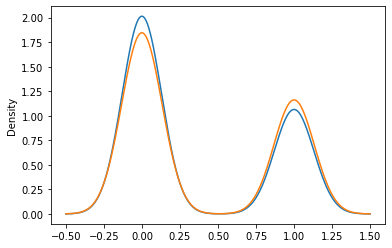

In [0]:
sorted_train['sex'].plot.density()
sorted_train['survived'].plot.density()


In [0]:
train.adult_male

105     True
68     False
253     True
320     True
706    False
       ...  
835    False
192    False
629     True
559    False
684     True
Name: adult_male, Length: 668, dtype: bool

In [0]:
#train['survived'].plot.density()
train['sex'].plot.density()

TypeError: ignored

In [0]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

In [0]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

In [0]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);